In [1]:
!cd /content/drive/MyDrive/CIFER_CNN

In [24]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
classes=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


'ship'

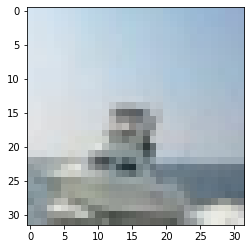

In [7]:
plt.imshow(x_train[100])
classes[y_train[100][0]]

In [8]:
  #Regularization
  x_train, x_test = x_train/255, x_test/255

'ship'

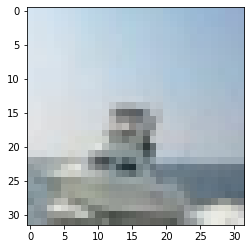

In [9]:
plt.imshow(x_train[100])
classes[y_train[100][0]]

In [10]:
model= Sequential()

In [11]:
#convo layer 1
model.add(Conv2D(10, kernel_size=2,activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

#convo layer 2
model.add(Conv2D(20, kernel_size=2,activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

#convo layer 3
model.add(Conv2D(30, kernel_size=2,activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D())

#Flatten
model.add(Flatten())

#ANN

#Hidden Layer 1
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

#Hidden Layer 2
model.add(Dense(64, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dropout(0.1))

#Hidden Layer 3
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.4))

#Output Layer
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss= tensorflow.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=50 ,batch_size= 32)

Epoch 1/50
1563/1563 [==============================] - 22s 7ms/step - loss: 1.9407 - accuracy: 0.2602
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6139 - accuracy: 0.4044
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4914 - accuracy: 0.4569
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4081 - accuracy: 0.4962
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3500 - accuracy: 0.5242
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2940 - accuracy: 0.5466
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2504 - accuracy: 0.5642
Epoch 8/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2185 - accuracy: 0.5792
Epoch 9/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1784 - accuracy: 0.5933
Epoch 10/50
1563/1563 [==============================] - 10s 6ms/step - l

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.0030 - accuracy: 0.6811


[1.0030142068862915, 0.6811000108718872]

In [15]:
import numpy as np


In [18]:
img_num=201
y_pred = model.predict(x_test)

classes[np.argmax(y_pred[img_num])]

'automobile'

'automobile'

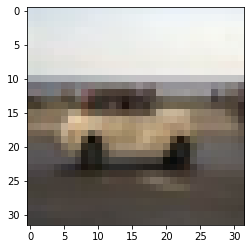

In [19]:
plt.imshow(x_test[img_num])
classes[y_test[img_num][0]]

In [22]:
model.save('/content/drive/MyDrive/CIFER_CNN/CIFER.h5')

In [25]:
test_img = image.load_img('/content/drive/MyDrive/CIFER_CNN/Deer_1.jpg', target_size=(32,32))
test_img = image.img_to_array(test_img)
test_img=test_img/255
test_img.shape

(32, 32, 3)

In [26]:
test_img= test_img.reshape(1,32,32,3)

In [27]:
load_model= tensorflow.keras.models.load_model('/content/drive/MyDrive/CIFER_CNN/CIFER.h5')

In [31]:
result = load_model.predict(test_img)
classes[np.argmax(result[0])]

'deer'

In [32]:
cd /content/drive/MyDrive/CIFER_CNN


/content/drive/MyDrive/CIFER_CNN


In [33]:
!pip freeze > requirements.txt